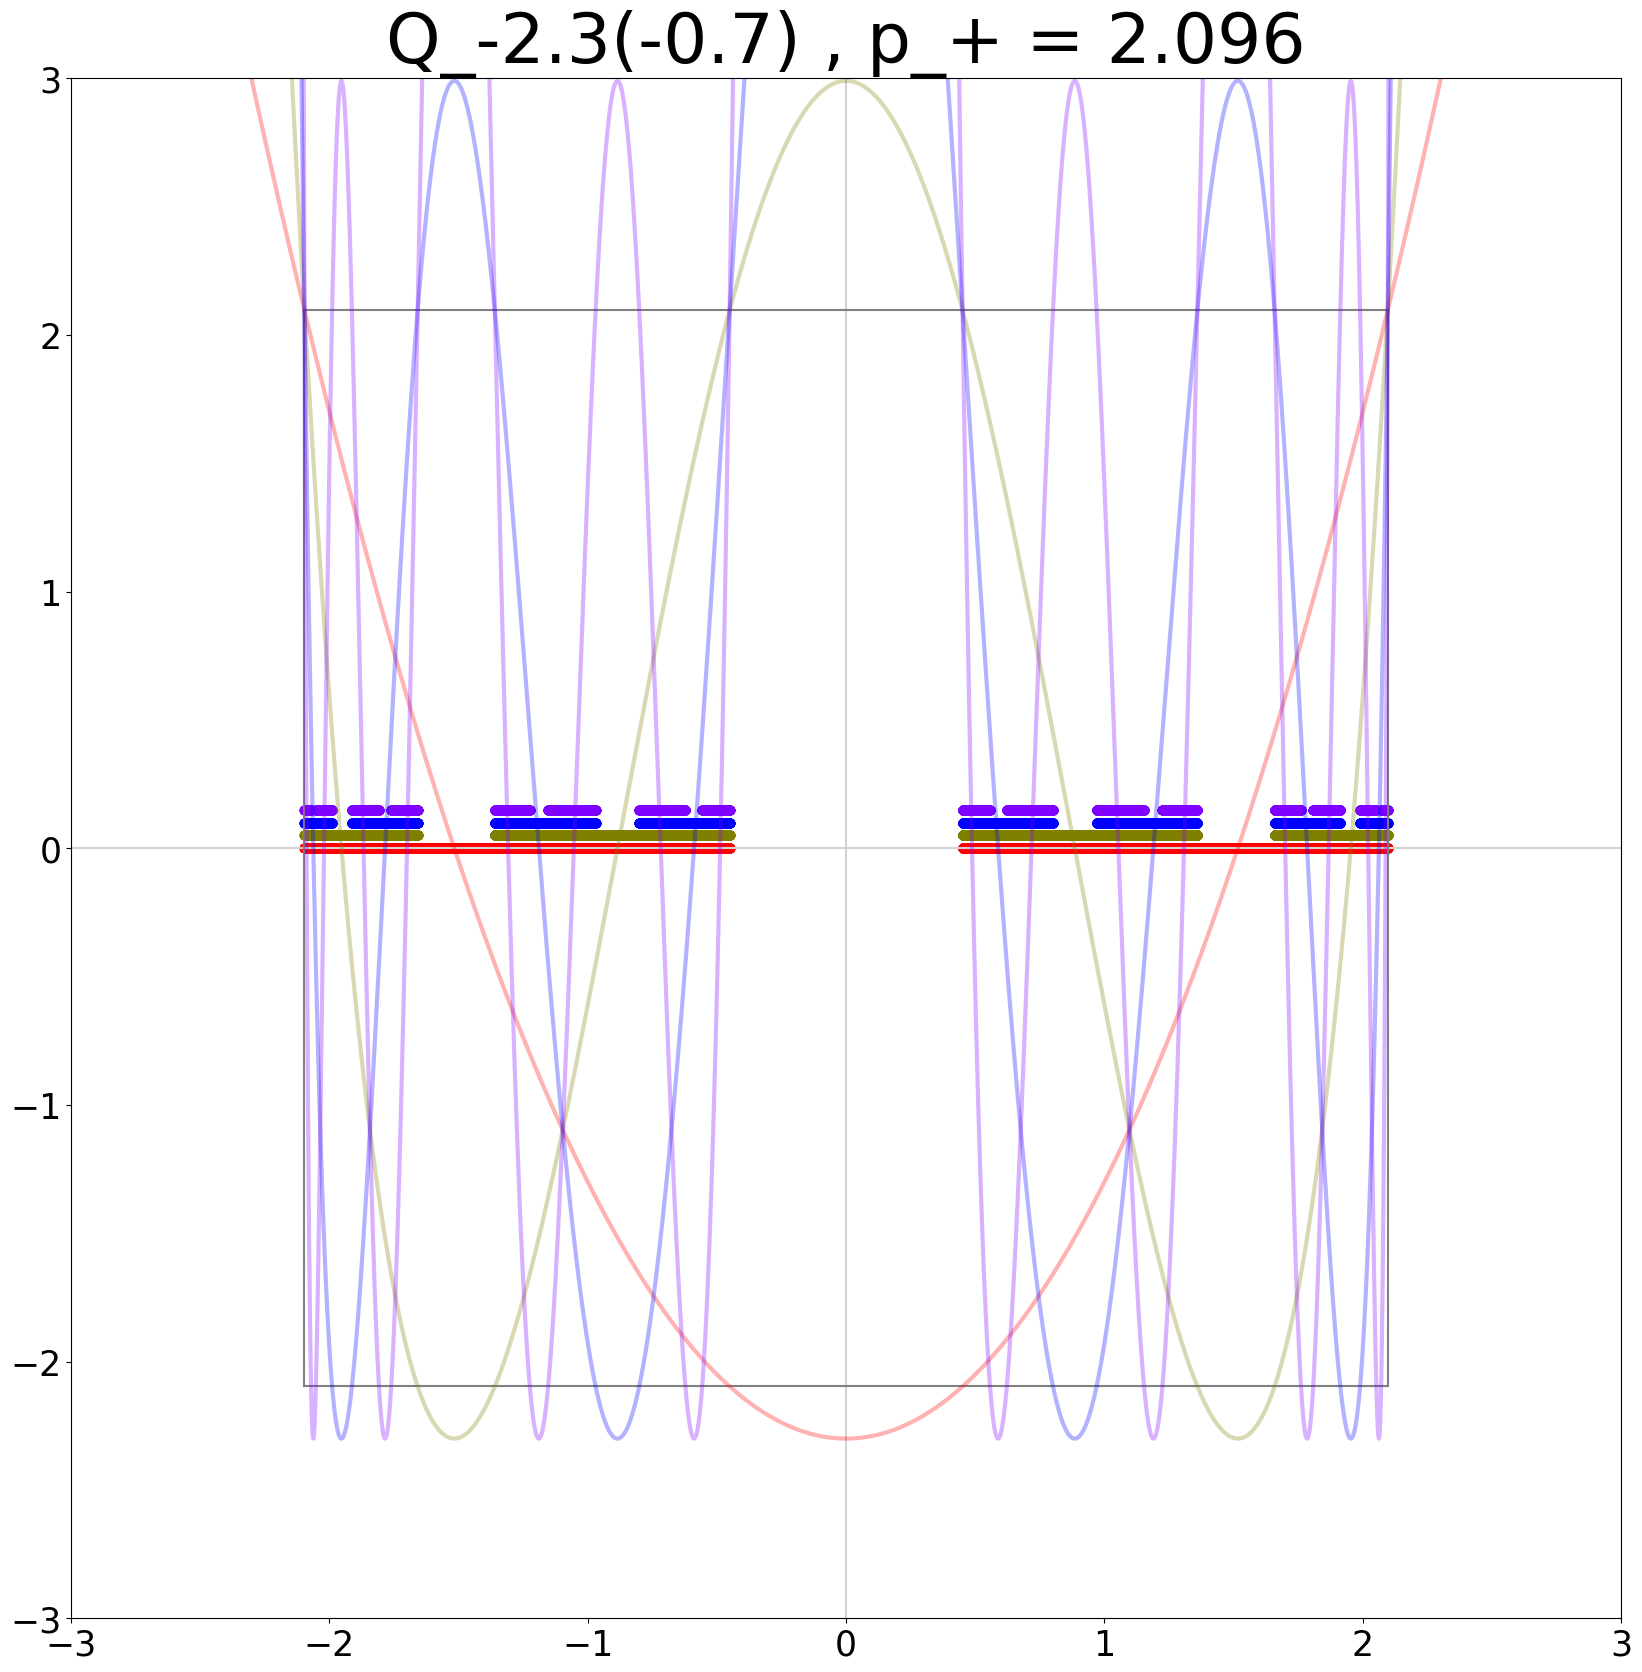

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
#used to set the fineness of the x axis; make this a power of 10
refinement=100001
#cut off for x values; i.e. abs(x)<maximum
maximum=10
x=np.linspace(-maximum,maximum,maximum*(refinement)+1)
#points
x_points=np.array([])
y_points=np.array([])
#paramater to change in the parabola; the property of fixed points changes drastically with c
c=-2.3
#p and q are the fixed points of the quadratic map
p=0.5*(1+math.sqrt(1-4*c))
q=0.5*(1-math.sqrt(1-4*c))
#starting seed
x_0=-0.7
#quadratic iteration; this code is not robust and only works for x**2
def fa(a):
    return((a*a)+c)
#lists for the first 5 iterates of the function
x1=fa(x)
x2=fa(x1)
x3=fa(x2)
x4=fa(x3)
x5=fa(x4)
#initializes the data
x_points = np.append(x_points,x_0)
y_points = np.append(y_points,fa(x_0))

#plotting garbage
f = plt.figure()
plt.title('Q_'+str(c)+'('+str(x_0)+') , p_+ = '+str(int(p*1000)/1000),fontsize=50)
f.set_figwidth(20)
f.set_figheight(20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.plot([-maximum,maximum],[0,0],color="lightgray")
plt.plot([0,0],[-maximum,maximum],color="lightgray")
plt.plot([-p,p],[-p,-p],color="gray")
plt.plot([p,p],[-p,p],color="gray")
plt.plot([-p,p],[p,p],color="gray")
plt.plot([-p,-p],[-p,p],color="gray")
a=3 #change this to change zoom of the graph
plt.axis([-a,a,-a,a])

#finds the intervals where |Q^k_c(x_0)| < p
def intervals(a):
    interval=[]
    pairs=[]
    for i in range(0,len(a)):
        if abs(a[i])<p and abs(x[i])<p:
            pairs.append([x[i],a[i]])
            interval.append(x[i])
    return(np.array(interval),pairs)
#finds the endpoints of the intervals where |Q^k_c(x_0)| < p
def endpoints(a):
    temp=intervals(a)
    b=temp[0]
    c=temp[1]
    endpoints=[]
    pairs=[]
    for i in range(0,len(b)-1):
        if abs(b[i+1]-b[i])>0.01:
            endpoints.append(b[i])
            endpoints.append(b[i+1])
            pairs.append(c[i])
            pairs.append(c[i+1])
    return(endpoints,pairs)
#I imagine these two functions above could be made into one as "intervals" feeds directly into "endpoints". If it ain't
#broke, don't fix it.

#the function which graphs 
def graph(a,col,translation): #a=xn, col=color in rgba; translation is needed to not graph all intervals as a blob
    b=intervals(a)[0]
    temp=endpoints(a)
    c=temp[0]
    d=temp[1]
    plt.plot(x,a,linewidth=3,color=col)
    plt.scatter(b,np.zeros(len(b))+translation,color=col)
#I choose what I want to graph or not by placing the pound sign infront of it. It's kind of a mess with them all overlayed.
graph(x1 ,(1,0,0,0.3),0)
graph(x2 ,(0.5,0.5,0,0.3),0.05)
graph(x3 ,(0,0,1,0.3),0.1)
graph(x4 ,(0.5,0,1,0.3),0.15)
#graph(x5,(0,0.5,1,0.3),0.2)